## Vector Autoregression on globally integrated BGC data
See statsmodels VAR documentation [here](https://www.statsmodels.org/stable/vector_ar.html?highlight=impulse%20response).

In [105]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str

In [121]:
pathout = '../../data/esm4/processed/global_integrals/'
adds = ['fgco2','hfds','intpp']
ds = xr.Dataset()
for add in adds:
    ds[add] = xr.open_dataarray(pathout+'esm4_'+add+'.nc')

In [122]:
def normalize(ds):
    return (ds-ds.mean('time'))/ds.std('time')

In [123]:
ds = normalize(ds)

In [124]:
df = ds.to_pandas().dropna()

In [125]:
model = VAR(df)

/nbhome/gam/miniconda3/envs/bio-pump-timescales/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [126]:
results = model.fit(12)

In [127]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jan, 2022
Time:                     17:52:58
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.20613
Nobs:                     1093.00    HQIC:                  -1.52155
Log likelihood:          -3605.23    FPE:                   0.180234
AIC:                     -1.71357    Det(Omega_mle):        0.163103
--------------------------------------------------------------------
Results for equation fgco2
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.001128         0.022705            0.050           0.960
L1.fgco2          0.807694         0.037515           21.530           0.000
L1.hfds           0.078933         0.030895            2.555           0.011

In [128]:
irf = results.irf(12)

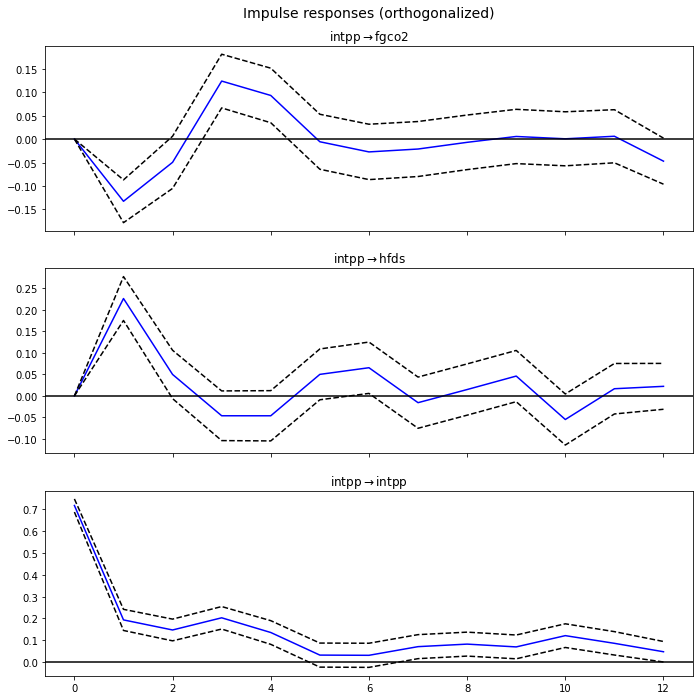

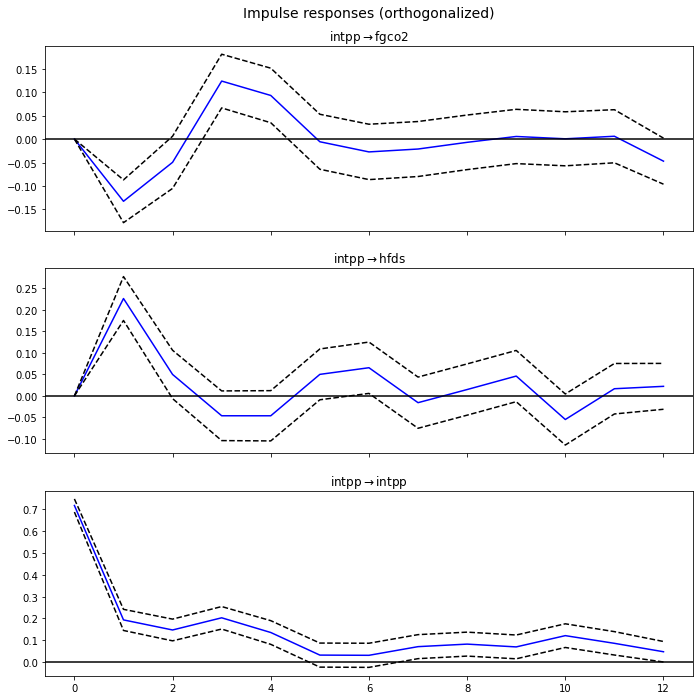

In [130]:
irf.plot(orth=True, impulse='intpp')

In [46]:
mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
model = VAR(data)

/nbhome/gam/miniconda3/envs/bio-pump-timescales/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


In [48]:
results = model.fit(2)

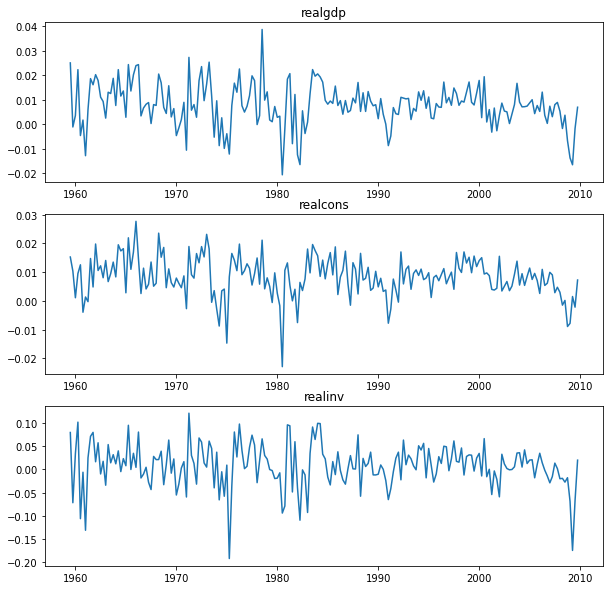

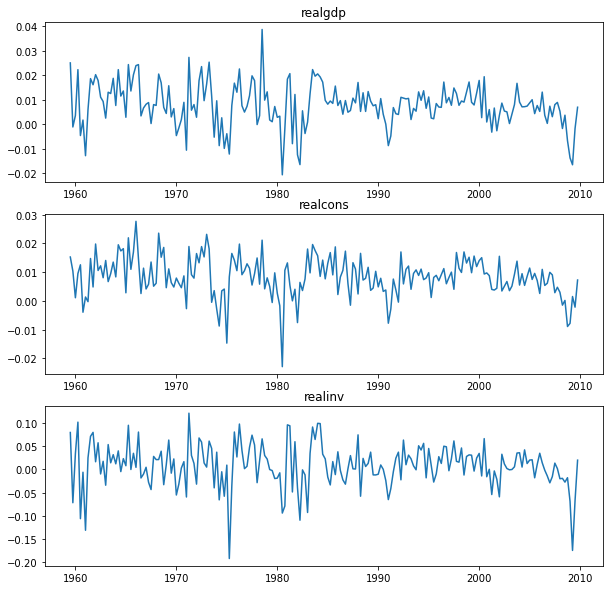

In [49]:
results.plot()